**CMPE 462 Project - Phase 1**

**Group 13: Doğukan Türksoy- Şefika Akman**


**Question 1. Perceptron Learning Algorithm.**

In this question you will implement the perceptron learning algorithm for a simple synthetic data set and
inspect it’s convergence rate. Our data set is a set of 2D-points uniformly sampled from the unit sphere
where a point is labeled +1 if it belongs to the upper hemisphere and -1 if it’s in the lower hemisphere.

**1-a)** Sample 1000 points from the data set as described. You can use the create dataset function in the
Helper Functions - Q1.ipynb notebook provided. Notice that the function creates the data set in
the format x = [1, x1, x2] to account for the bias. Visualize the data set using matplotlib. Your output
should be similar to the following:

Import needed libraries for Q1 - Perceptron Learning Algorithm by running below cell.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

Creating the dataset and labels:

In [ ]:
def sample_sphere(r=1, npoints=1000):
    dr = np.random.rand(npoints,1)
    theta = 2*np.pi*np.random.rand(npoints,1)
    x = dr * np.cos(theta)
    y = dr * np.sin(theta)
    return np.hstack((x,y))

def create_dataset(npoints=1000):
    points = sample_sphere(npoints=npoints)
    points = np.hstack((np.ones(npoints).reshape(npoints,1), points))
    labels = np.sign(points[:, 2])
    return points, labels

dataset, labels = create_dataset() #creating the dataset

Plotting the data :

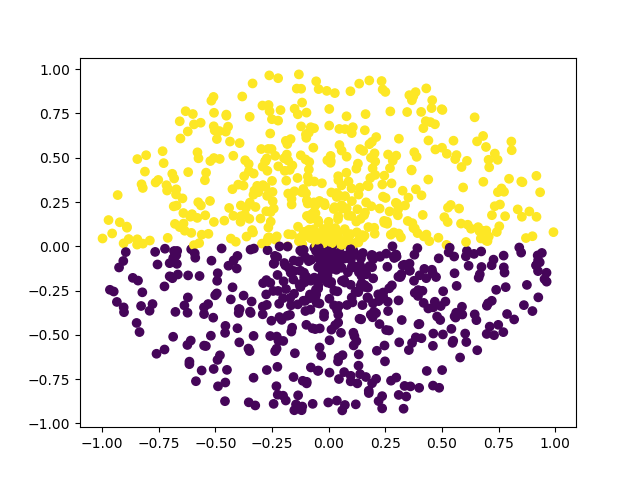

In [ ]:
fig, ax = plt.subplots()
colors =  np.random.uniform(15, 1280,1000)
for i in range(len(colors)):
    if labels[i] == 1.0:
        colors[i] = 1280
    else:
        colors[i] = 15
ax.scatter(dataset[:,1], dataset[:,2], c= colors, vmin=0, vmax=1000)
plt.show()

**1-b)** Implement the Perceptron Learning Algorithm and run the algorithm for a single pass over the data
set, i.e. do not consider any point more than once. Report the final w vector, and prediction accuracy over
the entire data set. Additionally, visualize the decision boundary. You may use numpy for implementation
and matplotlib for visualization.

Running Perceptron Learning Algorithm for our dataset.

In [ ]:
nonclassifiedset = [i for i in range(1000)] # to identify non-iterated points.

w = np.random.rand(3).T
iterate = True
while iterate == True:
    iterate =False #if every non-iterated points are estimated correct, this variable stays false and iterations will end.
    removeindex= -1
    for index in nonclassifiedset:
        prediction = np.sign(np.dot(w.T,dataset[index][:3]))

        if  prediction != labels[index] :   #if any prediction is false, weight is updated and iterations will continue.
            removeindex = index
            iterate = True

            w = np.add(w.T,labels[index] * dataset[index][:3] )
            break
    if removeindex != -1:        # removes the false predicted point from nonclassifiedset
        nonclassifiedset.remove(removeindex)

print("Weight is: " + str(w) + " \n")

Weight is: [ 0.05379482 -0.02201297  8.81538305] 



Plotting the data with the seperating line.

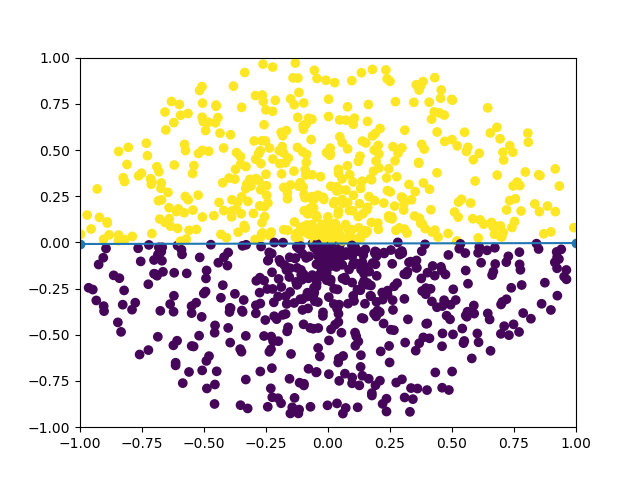

In [ ]:
fig, ax = plt.subplots()

ax.scatter(dataset[:,1], dataset[:,2], c= colors, vmin=0, vmax=1000)

plt.xlim(-1,1), plt.ylim(-1,1)
plt.plot([-1, 1], [w[1]/w[2] - w[0] / w[2] ,  -w[1] / w[2] - w[0] / w[2]  ] , marker = 'o')
plt.show()

Prints the accuracy rate .

In [ ]:
accuracy = 0


for i in range(1000):
    prediction = np.sign(np.dot(w.T,dataset[i][:3]))
    if prediction == labels[i]:
        accuracy += 1

print("Accuracy rate = " + str(accuracy/1000))

Accuracy rate = 0.987


**1-c)** For this question, you will theoretically explore the importance of bias with a simple example. Consider
again the classification problem with the perceptron but without bias. Construct a simple sample that
is linearly separable but is not separable with a perceptron without a bias. Argue formally that this is
the case for your example. What geometric property (restriction) of the no-bias perceptron limits it?
(Imagine a line in 2D or a plane in 3D without bias

**Question 1-C**

Consider a 2 variable binary classification problem. For this problem, w and x vectors are:

$$   \bf w = \begin{pmatrix}
      w_0 \\
      w_1 \\
      w_2 \\
    \end{pmatrix}
    \bf x = \begin{pmatrix}
      x_0 \\
      x_1 \\
      x_2 \\
    \end{pmatrix} $$

We can write the separation line equation as follows:    
$$ w^{T}x = {w_0}*{x_0} + {w_1} * {x_1} + {w_2} * {x_2} = 0 $$
We can assign following equations from the cartesian coordinate system:
 $$ {x_0} = b ,  {x_1} = x  , {x_2} = y $$  
Then the line equation has this form:
$$ w^{T}x = {w_0}*b + {w_1} * x + {w_2} * y = 0$$

If b = 0 (no bias) , then this line passes through the origin independent from w because there will be no constant term in the equation. If the optimal seperation line does not pass through the origin, perceptron without bias does not converge to a solution.

Our data in Phase1 - Question 1 can be separable by a line passing through the origin, so it can converge a solution even without bias.


**Question 2. Linear Regression.**

In the dataset file you are provided, you will find 10000 images under the 3dshapes-train folder and
the orientations-train.npy file which contains the orientation values of the images in order. You need
to use the numpy library to load this file which is simply an array of size 10000. Each image contains a
shape with a particular orientation, orientation can take 15 different values, linearly spaced between [-30,
30]. These will serve as our target labels.

**2-a)** Convert the training images into gray scale, flatten each image into a vector of length 4096(64x64)
and load them into a numpy array. You will obtain a matrix of size 10000x4096. You might need to use
an additional library for this, e.g. Pillow.

**2-b)** Treating your data matrix as X and the orientations as y, we can pose this as a linear regression
problem, looking for the minimizer of |kXw −yk|^2. Apply the linear regression algorithm and compute the
solution w*.

**2-c)** You are also provided with a test data set consisting of 1000 images under the 3dshapes-test folder.
Use the solution vector you obtained to make predictions on the test data. Notice that while our labels
take discrete values, linear regression predicts continuous values. Report the Mean Square Error(MSE)
between your predictions and target values in the orientations-test.npy file.

**2-d)** Using the entire image as the feature vector requires a very large data matrix which can make linear
regression computationally expensive for larger data sets. Research and apply a technique of your choice
from feature extraction/dimensionality reduction to obtain more compact feature vectors per image and
use your new features for linear regression. Report the size of your new features and the MSE on the test
data. Do not forget to cite your references.


Import needed libraries for Q2 - Linear Regression by running below cell.

In [ ]:
import numpy as np
# This import is needed if we use h5py data file directly.
# import h5py
from sklearn.decomposition import PCA
from PIL import Image


In this block, we are taking data from folders. Then, making them grayscale and then, flatten them. These features asked in part a.

In [ ]:
def taken_data(train_path = "3dshapes_train", test_path = "3dshapes_test"):
    train_images = np.array([np.asarray(Image.open(f"{train_path}/{i}.jpg")) for i in range(10000)])
    train_labels = np.load("orientations_train.npy")
    test_images = np.array([np.asarray(Image.open(f"{test_path}/{i}.jpg")) for i in range(1000)])
    test_labels = np.load("orientations_test.npy")

    gray_train_images = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2]))
    gray_test_images = np.zeros((test_images.shape[0], test_images.shape[1], test_images.shape[2]))

    gray_train_images[:, :, :] = train_images[:, :, :, 0] * 0.2989 + train_images[:, :, :, 1] * 0.5870 + train_images[:, :, :, 2] * 0.1140
    gray_test_images[:, :, :] = test_images[:, :, :, 0] * 0.2989 + test_images[:, :, :, 1] * 0.5870 + test_images[:, :, :, 2] * 0.1140

    flatten_train_images = gray_train_images.reshape(gray_train_images.shape[0], gray_train_images.shape[1]*gray_train_images.shape[2])
    flatten_test_images = gray_test_images.reshape(gray_test_images.shape[0], gray_test_images.shape[1]*gray_test_images.shape[2])

    print("Size of the training matrix: ", flatten_train_images.shape)

    return flatten_train_images, train_labels, flatten_test_images, test_labels

This part of the code is a version of taken_data function to take data from h5py file.

In [ ]:
# def take_data(file_path='./3dshapes.h5'):
#     dataset = h5py.File(file_path, 'r')
#     all_images = dataset['images']
#     all_labels = dataset['labels']
#     train_images = all_images[0:10000, :, :, :]  # array shape [480000,64,64,3], uint8 in range(256)
#     train_labels = all_labels[0:10000, 5].reshape(-1, 1)  # array shape [480000,6], float64
#     test_images = all_images[10000:11000, :, :, :]
#     test_labels = all_labels[10000:11000, 5].reshape(-1, 1)

#     gray_train_images = np.zeros((train_images.shape[0], train_images.shape[1], train_images.shape[2]))
#     gray_test_images = np.zeros((test_images.shape[0], test_images.shape[1], test_images.shape[2]))

#     gray_train_images[:, :, :] = train_images[:, :, :, 0] * 0.2989 + train_images[:, :, :, 1] * 0.5870 + train_images[:, :, :, 2] * 0.1140
#     gray_test_images[:, :, :] = test_images[:, :, :, 0] * 0.2989 + test_images[:, :, :, 1] * 0.5870 + test_images[:, :, :, 2] * 0.1140

#     flatten_train_images = gray_train_images.reshape(gray_train_images.shape[0], gray_train_images.shape[1]*gray_train_images.shape[2])
#     flatten_test_images = gray_test_images.reshape(gray_test_images.shape[0], gray_test_images.shape[1]*gray_test_images.shape[2])

#     return flatten_train_images, train_labels, flatten_test_images, test_labels


This function calculates mean square error.

In [ ]:
def mean_square_error(y, y_hat):
    difference = y - y_hat
    square = np.square(difference)
    total = np.sum(square)
    mean = total / y.shape[0]
    return mean

This function is for part d of question 2. It uses scikit-learn pca(principal componant analysis). (Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [ ]:
def dim_reduction(train, test):
    pca = PCA(n_components=2800)

    train = pca.fit_transform(train)
    test = pca.transform(test)

    return train, test

This is the main function where all functions called. Firstly, we are taking the data. Then, calculating w*, predictions and mse. Then, we are using pca method then again calculating w*, predictions and mse.

In [ ]:
if __name__ == '__main__':
    train_data, train_label, test_data, test_label = taken_data()
    # train_data, train_label, test_data, test_label = take_data()

    w_star = np.dot(np.linalg.pinv(train_data), train_label)
    print("wstar: ", w_star)
    predictions = np.dot(test_data, w_star)
    mse = mean_square_error(predictions, test_label)
    print("mse: ", mse)

    train_data, test_data = dim_reduction(train_data, test_data)

    w_star = np.dot(np.linalg.pinv(train_data), train_label)
    print("wstar pca: ", w_star)
    predictions = np.dot(test_data, w_star)
    mse = mean_square_error(predictions, test_label)
    print("mse pca: ", mse)

NameError: ignored

For part d of the question 2, we have used principal component analysis(pcs) from scikit-learn. Pca is used for dimentional reduction by using Singular Value Decomposition, it also uses LAPACK implementation. We gave the number of the components (n_components) as 1000.